# Headings

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
houseData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [43]:
df = houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']]
df.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


# Problem 1 : Analysis of Numeric Variables

# 1a


var: LotArea
Q1 25 percentile of LotArea is,  7549.0
Q2 50 percentile of LotArea is,  9478.5
Q3 75 percentile of LotArea is,  11603.0
Interquartile range for LotArea is 4054.0
low_limit for LotArea is 1468.0
up_limit for LotArea is 17684.0
Outliers in LotArea is [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]
Number of outliers for LotArea is 68

var: GrLivArea
Q1 25 percentile of GrLivArea is,  1129.0
Q2 50 percentile of GrLivArea is,  1464.0
Q3 75 percentile of GrLivArea is,  1777.5
Interquartile range for GrLivArea is 648.5
low_limit for GrLivArea is 156.25


<Figure size 1440x1440 with 0 Axes>

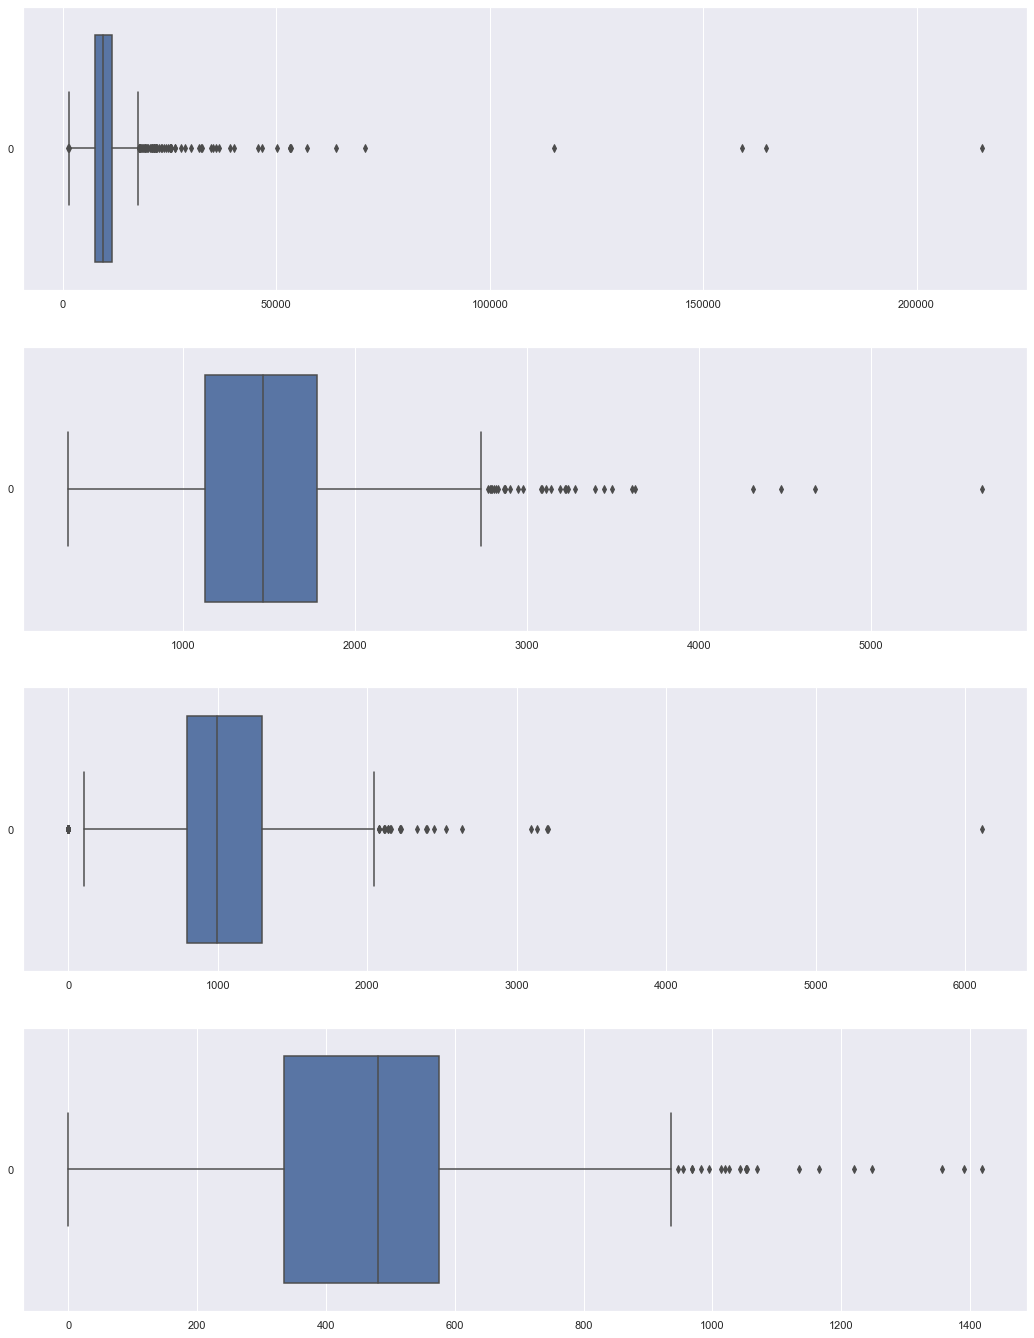

In [28]:
to_analyze_lst = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
f = plt.figure(figsize=(20, 20))
count = 0

# Draw the distributions of all variables
f, axes = plt.subplots(4, 1, figsize=(18, 24))

for var in to_analyze_lst:
    #print out each quartile in each variable
    print(f"\nvar: {var}")
    sort_data = np.sort(df)
    Q1 = np.percentile(df[var], 25, interpolation = 'midpoint')
    Q2 = np.percentile(df[var], 50, interpolation = 'midpoint')
    Q3 = np.percentile(df[var], 75, interpolation = 'midpoint')

    print(f'Q1 25 percentile of {var} is, ', Q1)
    print(f'Q2 50 percentile of {var} is, ', Q2)
    print(f'Q3 75 percentile of {var} is, ', Q3)

    #get and print out interquartile range
    IQR = Q3 - Q1
    print(f'Interquartile range for {var} is', IQR)

    #get lower and upper limit
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print(f'low_limit for {var} is', low_lim)
    print(f'up_limit for {var} is', up_lim)

    #find outlier data
    outlier =[]
    for x in df[var]:
        if ((x> up_lim) or (x<low_lim)):
             outlier.append(x)
    print(f'Outliers in {var} is', outlier)
    print(f"Number of outliers for {var} is", len(outlier))

    #PRINT OUT BOX PLOT
    sb.boxplot(data = df[var], orient = "h", ax = axes[count])
    count += 1

**Number of outliers for LotArea is 68**

**Number of outliers for GrLivArea is 31**

**Number of outliers for TotalBsmtSF is 61**

**Number of outliers for GarageArea is 21**

# 1b

In [39]:
df.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [38]:
print(df.corr())

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


**LotArea is positive skew, +12.207688**

In [36]:
f = plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

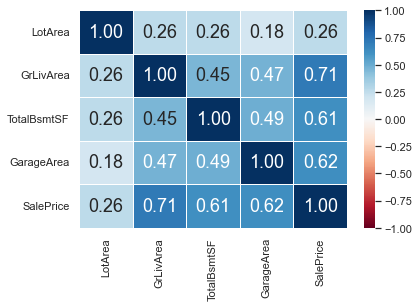

In [37]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Two variables that help us the most in predicting ‘SalePrice’ of houses is GlivArea and GarageArea siunce they have the hightest correlation coefficient 0.71 and 0.61**

# Problem 2

In [44]:
to_analyze_lst_2 = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
df2 = houseData[to_analyze_lst_2 + ['SalePrice']]
df2.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


In [50]:
#for loop to print no. of unique values and all varibales in list
for var in to_analyze_lst_2:
    n = df2[var].nunique()
    print(f"\nUnique values in {var} is {n}")
    c = df2[var].value_counts()
    print(f"\nVar: {var}")
    print(c);


Unique values in MSSubClass is 15

Var: MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Unique values in Neighborhood is 25

Var: Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Unique values in BldgType is 5

Var: BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Unique values in OverallQual is 10

Var: OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2  

**Highest number of unique values is in Neighborhood which is 25**

**levels has the highest number of houses is level 20 from MSSubClass, 536**

# 2b

In [51]:
df2.dtypes

MSSubClass       int64
Neighborhood    object
BldgType        object
OverallQual      int64
SalePrice        int64
dtype: object

In [53]:
df2.head(50)

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000
5,50,Mitchel,1Fam,5,143000
6,20,Somerst,1Fam,8,307000
7,60,NWAmes,1Fam,7,200000
8,50,OldTown,1Fam,7,129900
9,190,BrkSide,2fmCon,5,118000


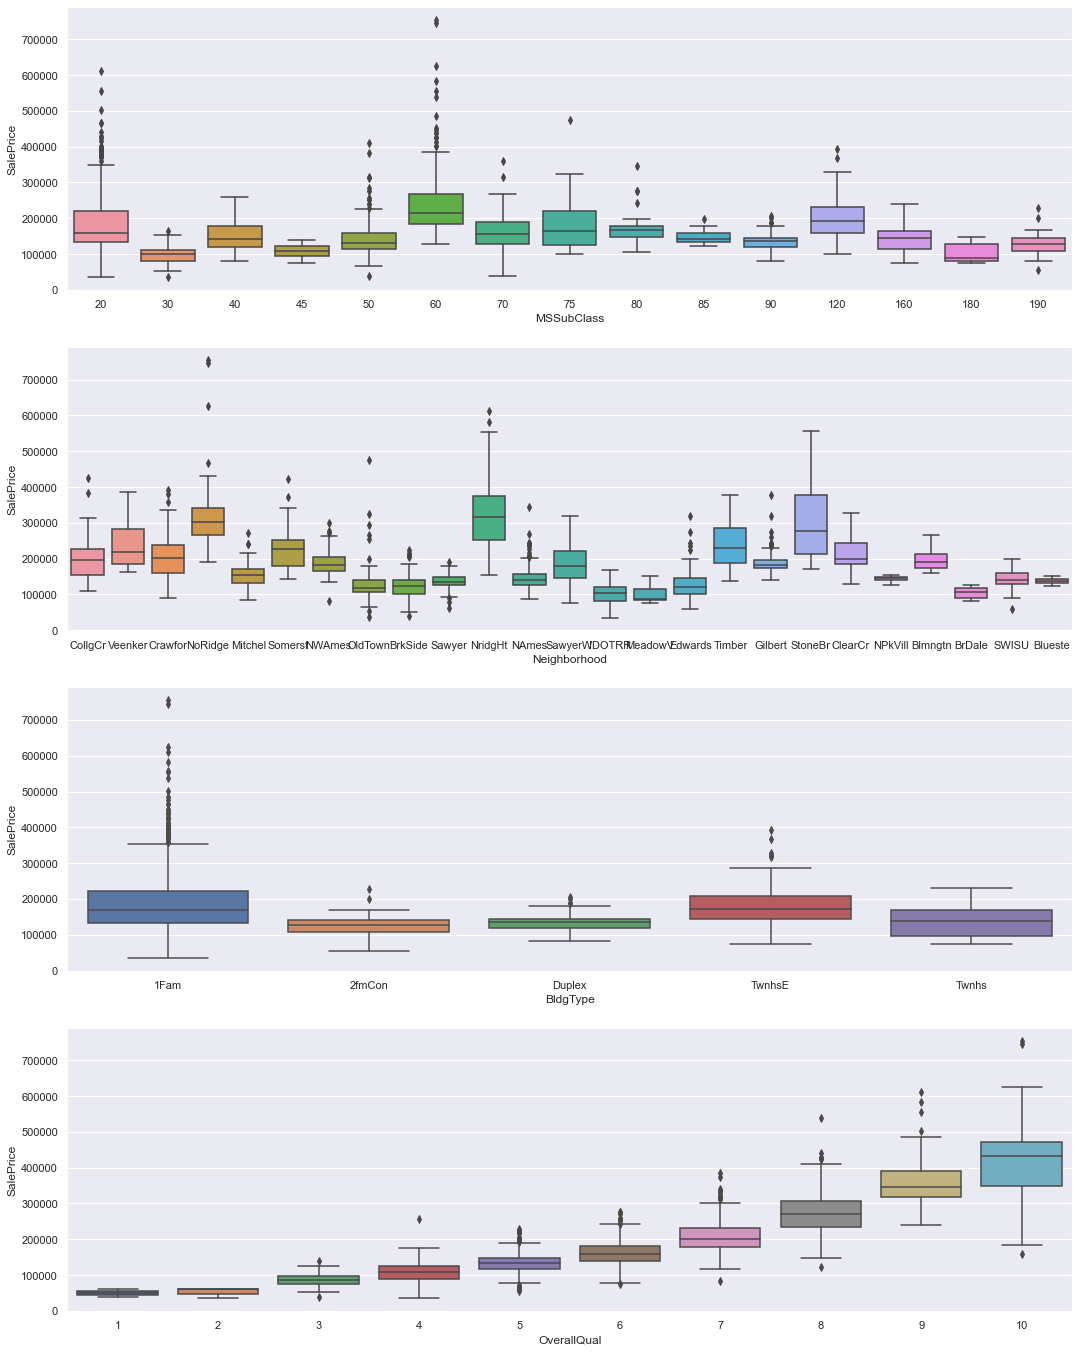

In [59]:
count = 0
f, axes = plt.subplots(4,1,figsize=(18,24))

for var in to_analyze_lst_2:
    sb.boxplot(data=df2, y='SalePrice', x=var, ax=axes[count])
    count += 1

**The top 2 predictors of SalePrice are OverallQual and Neighborhood, sin ce they have low amount of overlap between the boxplots**

# Problem 3

# 3a

In [65]:
df3 = houseData[['GarageType', 'SalePrice']]
df3.head()

,GarageType,SalePrice
0,Attchd,208500
1,Attchd,181500
2,Attchd,223500
3,Detchd,140000
4,Attchd,250000


In [66]:
#check which houses have garage
haveHouse = df3['GarageType'].isnull().sum()
print(f"There are {haveHouse} houses with no garage.")
df3['GarageType'].unique()

There are 81 houses with no garage.


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [69]:
d = {'GarageType':{'Attchd': 1, 'Detchd': 1, 'BuiltIn': 1, 'Basment': 1, '2Types': 1, 'CarPort': 1}}
df3 = df3.replace(d)
# df_3['GarageType'].astype(int)
df3['GarageType'] = df3['GarageType'].fillna(0)
df3.dtypes

GarageType    float64
SalePrice       int64
dtype: object

In [71]:
df3.head()

,GarageType,SalePrice
0,1.0,208500
1,1.0,181500
2,1.0,223500
3,1.0,140000
4,1.0,250000


In [73]:
df3.corr()

,GarageType,SalePrice
GarageType,1.000000,0.236832
SalePrice,0.236832,1.000000


**SalePrice of a house does not get affected by whether it has a Garage**